In [141]:
%config Completer.use_jedi=False
import opendatasets as od 
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk


def text_classifier(df,coluna_texto,coluna_target):
    vectorize = CountVectorizer(max_features=50)
    bag_of_words = vectorize.fit_transform(df[coluna_texto])
    X_train, X_test, y_train, y_test = train_test_split(
        bag_of_words, df[coluna_target], test_size=0.33, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    return lr.score(X_test,y_test)

def nuvem_de_palavras(df,coluna_texto,sentimento):
    palavras = ' '.join([palavra for palavra  in data[coluna_texto].loc[df.sentiment == sentimento]])
    nuvem = WordCloud(width=800,height=500, max_font_size=100, collocations=False).generate(palavras)
    return nuvem

def pareto_palavras(df,coluna_texto,quantidade):
    palavras = ' '.join([palavra for palavra  in df[coluna_texto]])
    tk_espaços = nltk.tokenize.WhitespaceTokenizer()
    tk_frases = tk_espaços.tokenize(palavras)
    frequencia = nltk.FreqDist(tk_frases)
    df_freq = pd.DataFrame({'Palavras':list(frequencia.keys()),
                       'Frequencia':list(frequencia.values())})
    df_quantidade = df_freq.sort_values(by='Frequencia',ascending=False).head(quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_quantidade,x='Palavras',y='Frequencia')
    plt.show(ax)

def dados_frequencia(df,coluna_texto,intervalo_inicio=0,intervalo_fim=20):
    
    palavras = ' '.join([palavra for palavra  in df[coluna_texto]])
    tk_espaços = nltk.tokenize.WhitespaceTokenizer()
    tk_frases = tk_espaços.tokenize(palavras)
    frequencia = nltk.FreqDist(tk_frases)
    df_freq = pd.DataFrame({'Palavras':list(frequencia.keys()),
                       'Frequencia':list(frequencia.values())})
    df_quantidade = df_freq.sort_values(by='Frequencia',ascending=False).iloc[intervalo_inicio:intervalo_fim]
    return df_quantidade
    
def pareto_por_sentimento(df,coluna_texto,intervalo_inicio=0,intervalo_fim=20):   
    stacked_bar_data_neg = dados_frequencia(data.loc[data.sentiment==0],
                                            coluna_texto,intervalo_inicio=intervalo_inicio,intervalo_fim=intervalo_fim)
    stacked_bar_data_pos = dados_frequencia(data.loc[data.sentiment==1],
                                            coluna_texto,intervalo_inicio=intervalo_inicio,intervalo_fim=intervalo_fim)
    df_merge = pd.merge(stacked_bar_data_neg,stacked_bar_data_pos, on='Palavras',how='outer')
    df_merge = df_merge.dropna()
    df_merge['Soma'] = df_merge.Frequencia_x + df_merge.Frequencia_y
    df_merge = df_merge.sort_values(by='Soma', ascending=False)
    df_neg = df_merge[['Palavras', 'Frequencia_x']]
    df_pos = df_merge[['Palavras', 'Frequencia_y']]
    #Definindo as duas data frames com os valores de frequencia das palavras mais frequentes
    df_merge = pd.merge(df_neg,df_pos, on='Palavras',how='outer')
    df_merge = df_merge.fillna(0)
    df_merge

    # Defininco configurações gerais do Gráfico
    sns.set_style("white")
    sns.set_context({"figure.figsize": (24, 10)})

    #Plotando o primeiro gráfico que ficará ao fundo
    sns.barplot(x = df_neg.Palavras, y = df_neg.Frequencia_x, color = "red", alpha=0.6)

    #Plotando o segundo gráfico, que ficará por cima
    bottom_plot = sns.barplot(x = df_pos.Palavras, y = df_pos.Frequencia_y, alpha= 0.6, color = "#0000A3")

    #definindo detalhes do plot
    topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
    l = plt.legend([bottombar, topbar], ['Positivas', 'Negativas'], loc=1, ncol = 2, prop={'size':16})
    l.draw_frame(False)

    # #Rotulando os eixos
    sns.despine(left=True)
    bottom_plot.set_ylabel("Frequancia de Cada Palavra")
    bottom_plot.set_xlabel("Palavras")
    plt.xticks(rotation=90)


    # #Define as fontes de cada rótulo como de tamanho 16pt
    for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
                 bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
        item.set_fontsize(16)

In [2]:
caminho = '../src/data/'
url = 'https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr'
od.download_kaggle_dataset(dataset_url=url,data_dir=caminho)

Skipping, found downloaded files in "../src/data/imdb-ptbr" (use force=True to force download)


In [3]:
data = pd.read_csv('../src/data/imdb-ptbr/imdb-reviews-pt-br.csv',index_col=0)

In [4]:
troca = {'neg': 0,
         'pos': 1}
data.sentiment = data.sentiment.replace(troca)

In [5]:
data.head()

,text_en,text_pt,sentiment
id,,,
1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


Classifixando com regressão logistica os dados por Bag of Words

In [6]:
text_classifier(data, 'text_pt','sentiment')

0.6694645264060777

Utilizando o Word Cloud prara apresentar um gráfico com as palavras mais frequentes

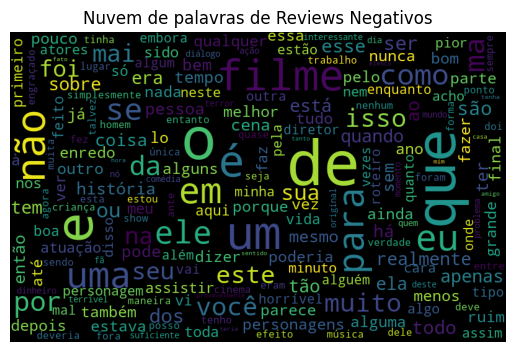

In [7]:
nuvem_neg = nuvem_de_palavras(data,'text_pt',sentimento=0)
plt.figure()
plt.imshow(nuvem_neg)
plt.title('Nuvem de palavras de Reviews Negativos')
plt.axis('off')
plt.show()

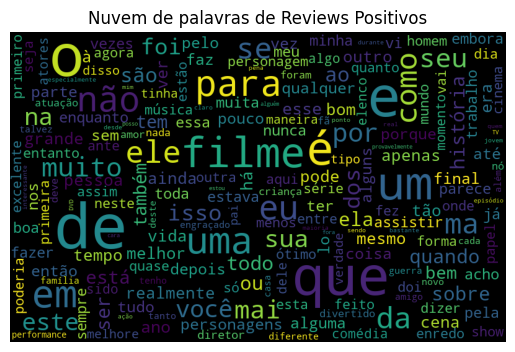

In [8]:
nuvem_pos = nuvem_de_palavras(data,'text_pt',sentimento=1)
plt.figure()
plt.imshow(nuvem_pos)
plt.title('Nuvem de palavras de Reviews Positivos')
plt.axis('off')
plt.show()

Mostrar um gráfico de Pareto com a frequencia das palavras que mais ocorrem no texto

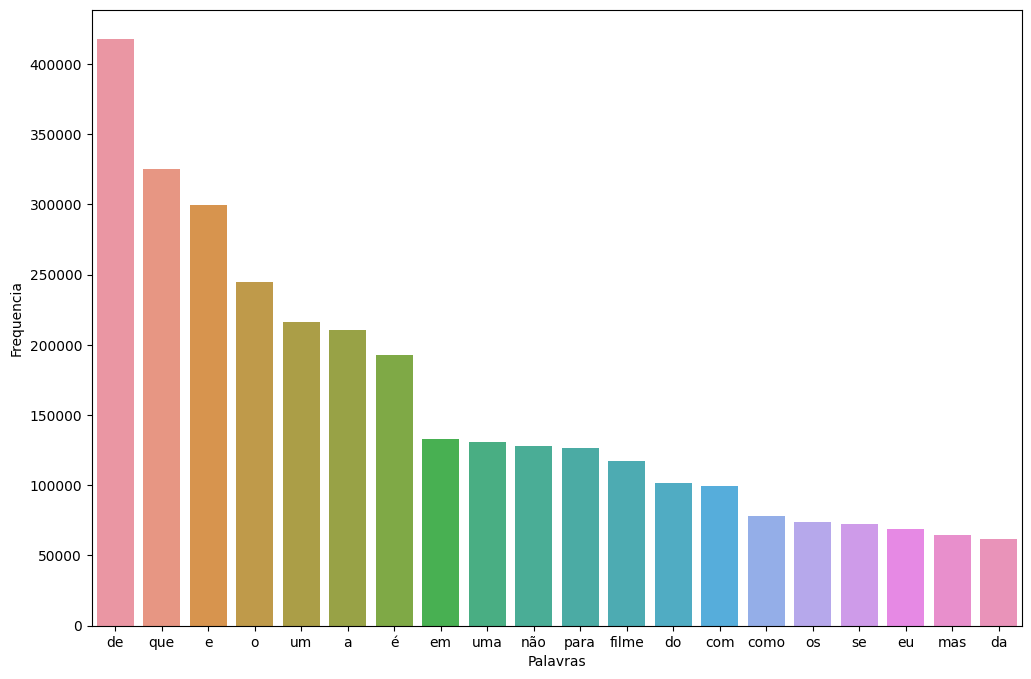

In [10]:
pareto_palavras(data,'text_pt',20)

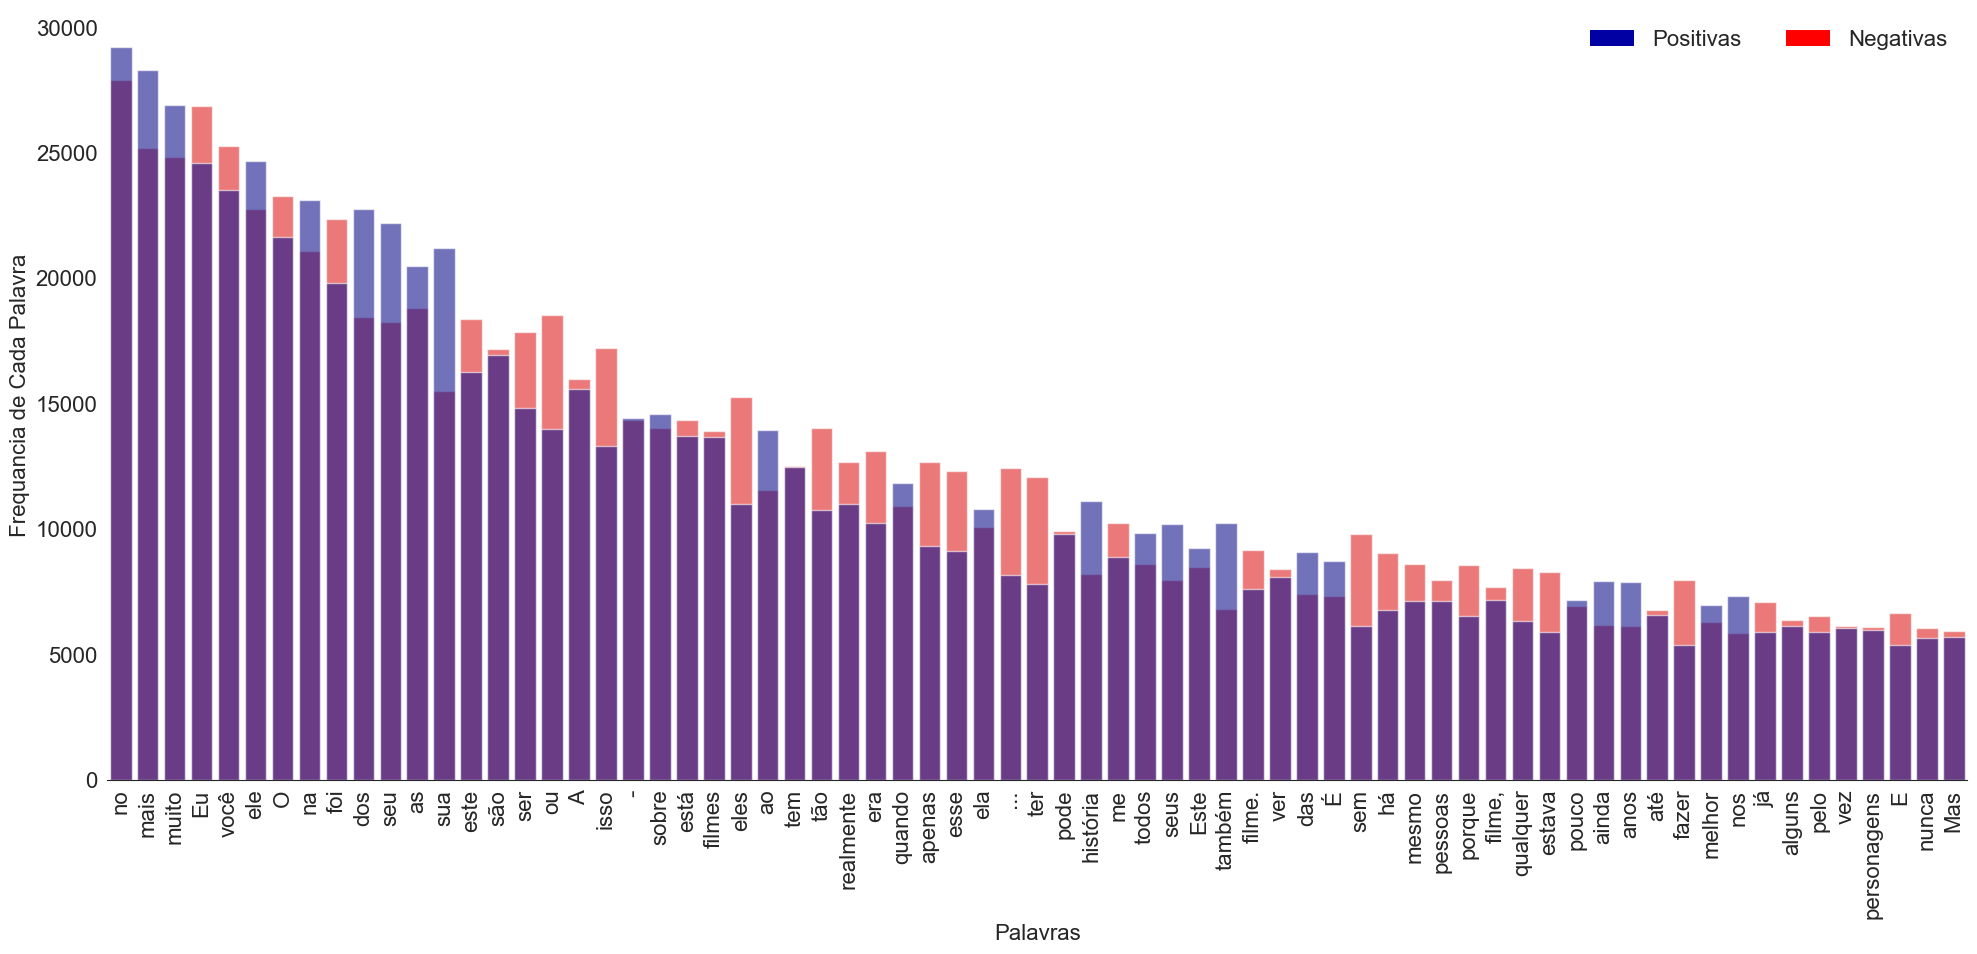

In [128]:
pareto_por_sentimento(data,'text_pt',intervalo_inicio=20,intervalo_fim=100)

In [134]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')


In [138]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processada = []
for opiniao in data.text_pt:
    nova_frase = []
    tk_espaços = nltk.tokenize.WhitespaceTokenizer()
    palavras_texto = tk_espaços.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
data['tratamento1'] = frase_processada
data.head()

,text_en,text_pt,sentiment,tratamento1
id,,,,
1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."


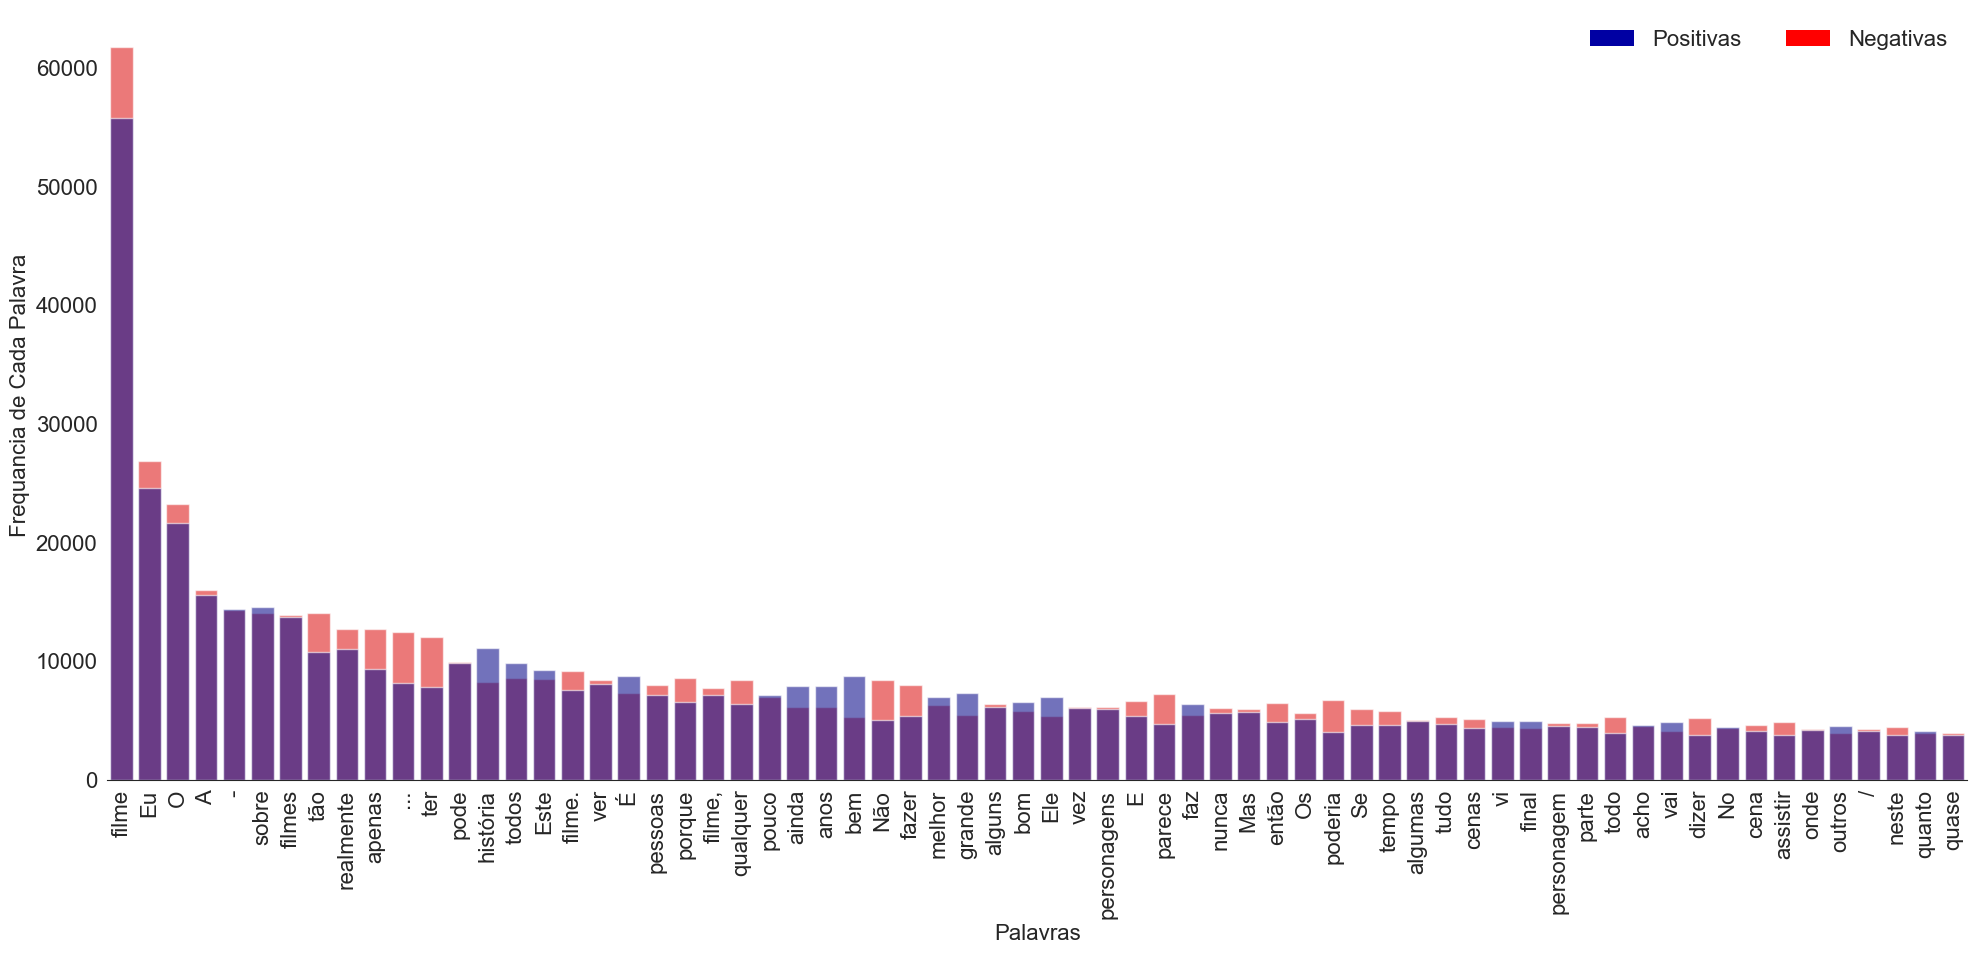

In [142]:
pareto_por_sentimento(data,'tratamento1',intervalo_fim=80)

In [140]:
text_classifier(data,'tratamento1','sentiment')

0.6668913123391741

In [151]:
def dados_freq_total(df,coluna_texto):
    
    palavras = ' '.join([palavra for palavra  in df[coluna_texto]])
    tk_espaços = nltk.tokenize.WhitespaceTokenizer()
    tk_frases = tk_espaços.tokenize(palavras)
    frequencia = nltk.FreqDist(tk_frases)
    df_freq = pd.DataFrame({'Palavras':list(frequencia.keys()),
                       'Frequencia':list(frequencia.values())})
    df_quantidade = df_freq.sort_values(by='Frequencia',ascending=False)
    return df_quantidade

In [153]:
stacked_bar_data_neg = dados_freq_total(data.loc[data.sentiment==0],'tratamento1')
stacked_bar_data_pos = dados_freq_total(data.loc[data.sentiment==1],'tratamento1')

df_merge = pd.merge(stacked_bar_data_neg,stacked_bar_data_pos, on='Palavras',how='outer')
df_merge = df_merge.dropna()
df_merge['Soma'] = abs(df_merge.Frequencia_x - df_merge.Frequencia_y)
df_merge = df_merge.sort_values(by='Soma', ascending=False)
df_neg = df_merge[['Palavras', 'Frequencia_x']]
df_pos = df_merge[['Palavras', 'Frequencia_y']]


In [171]:
df_merge.sort_values('Soma',ascending=False).tail(110000)

,Palavras,Frequencia_x,Frequencia_y,Soma
2617,é?,162.0,83.0,79.0
3656,interminável,112.0,33.0,79.0
4373,Leslie,91.0,170.0,79.0
2849,ano.,148.0,227.0,79.0
7106,Craig,52.0,131.0,79.0
...,...,...,...,...
202994,"pai"",",1.0,1.0,0.0
203029,Frontline.,1.0,1.0,0.0
219935,exec.,1.0,1.0,0.0
203027,fontes;,1.0,1.0,0.0


In [146]:
stacked_bar_data_neg = df_quantidade.loc[df_quantidade.sentiment==0]
stacked_bar_data_pos = df_quantidade.loc[df_quantidade.sentiment==1]
df_merge = pd.merge(stacked_bar_data_neg,stacked_bar_data_pos, on='Palavras',how='outer')
df_merge = df_merge.dropna()
df_merge['Soma'] = df_merge.Frequencia_x + df_merge.Frequencia_y
df_merge = df_merge.sort_values(by='Soma', ascending=False)
df_merge


In [150]:
df_quantidade

,Palavras,Frequencia
5,filme,117543
243,Eu,51485
31,O,44924
19,A,31547
194,-,28767
...,...,...
215469,"Elliott"",",1
88376,favorecidas.,1
215471,"Cast""",1
215472,GEM.,1


In [148]:
stacked_bar_data_neg = df_quantidade.loc[df_quantidade.sentiment==0]
stacked_bar_data_pos = df_quantidade.loc[df_quantidade.sentiment==1]
df_merge = pd.merge(stacked_bar_data_neg,stacked_bar_data_pos, on='Palavras',how='outer')
df_merge = df_merge.dropna()
df_merge['Soma'] = df_merge.Frequencia_x + df_merge.Frequencia_y
df_merge = df_merge.sort_values(by='Soma', ascending=False)
df_merge

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).